In [1]:
import pandas as pd
pd.read_csv('Fish.csv')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


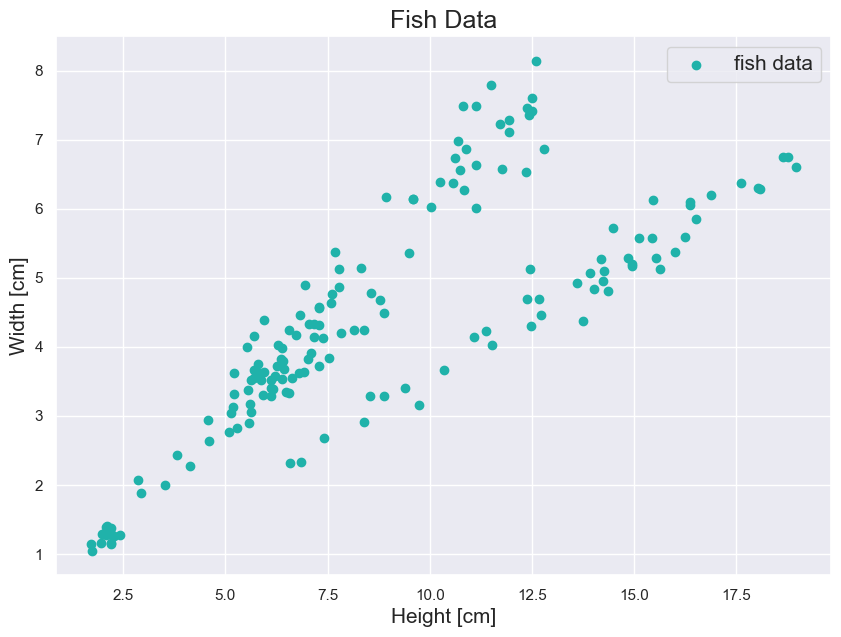

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("fish.csv")
df = df[["Height", "Width"]]
plt.figure(figsize = (10, 7))
plt.scatter(df.Height, 
            df.Width, 
            color = "lightseagreen",
            label = "fish data")
plt.xlabel("Height [cm]", fontsize = 15)
plt.ylabel("Width [cm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Fish Data", fontsize = 18)
plt.show()


The given code defines a class called SingleNeuron which represents a single artificial neuron. This neuron can be trained and then used to make predictions on unseen data.

In [9]:
import numpy as np

class SingleNeuron:
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha * error * xi
                self.w_[-1] -= alpha * error
                errors += 0.5 * (error ** 2)
            self.errors_.append(errors / X.shape[0])

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [10]:
X = df.Width.values
X = X.reshape(-1, 1)
y = df.Height.values

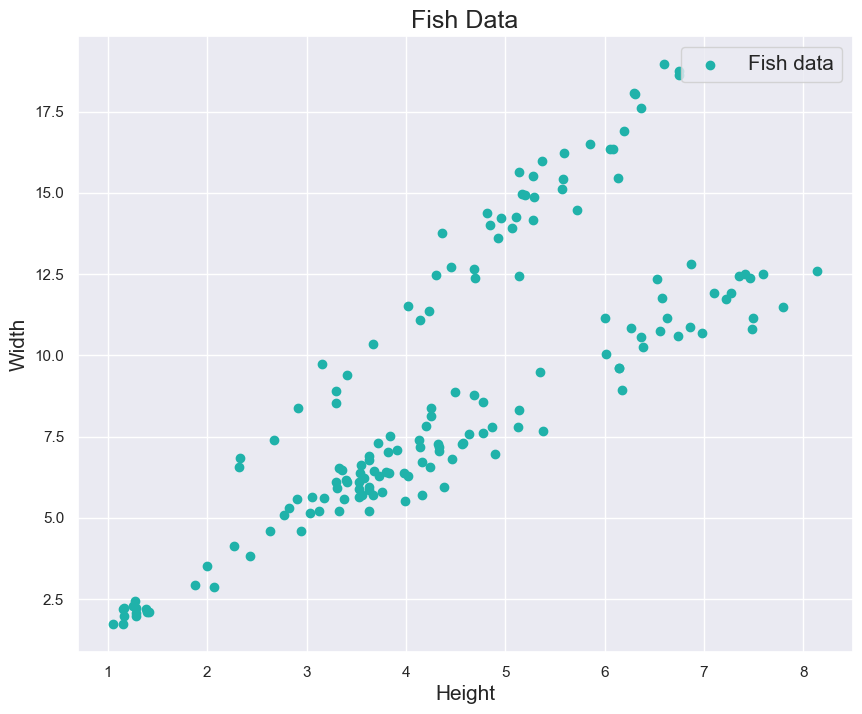

In [11]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Fish data")
plt.xlabel("Height", fontsize = 15)
plt.ylabel("Width", fontsize = 15)
plt.title("Fish Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()


In [12]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

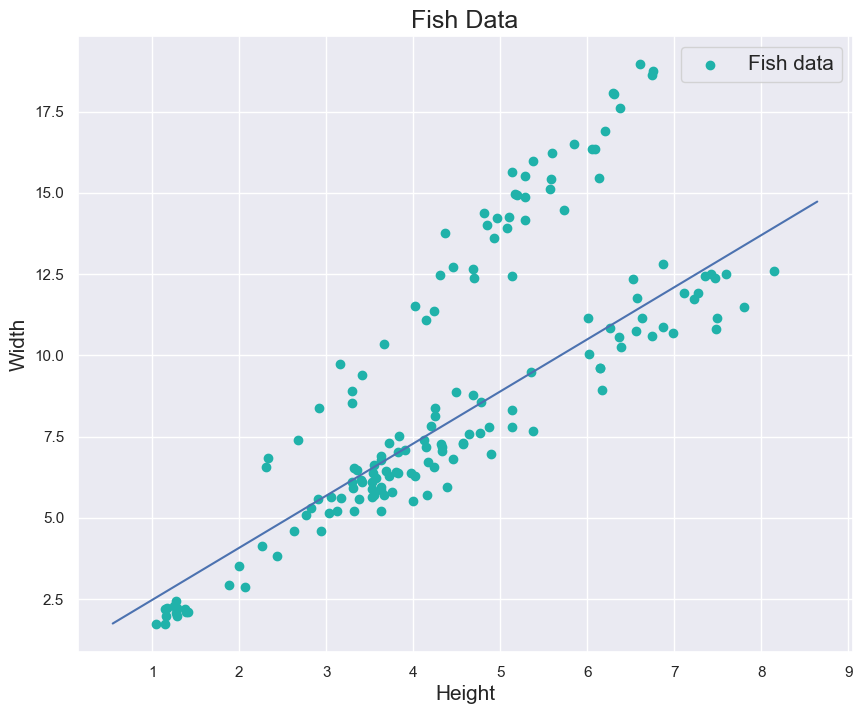

In [15]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Fish data")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Height", fontsize = 15)
plt.ylabel("Width", fontsize = 15)
plt.title("Fish Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()


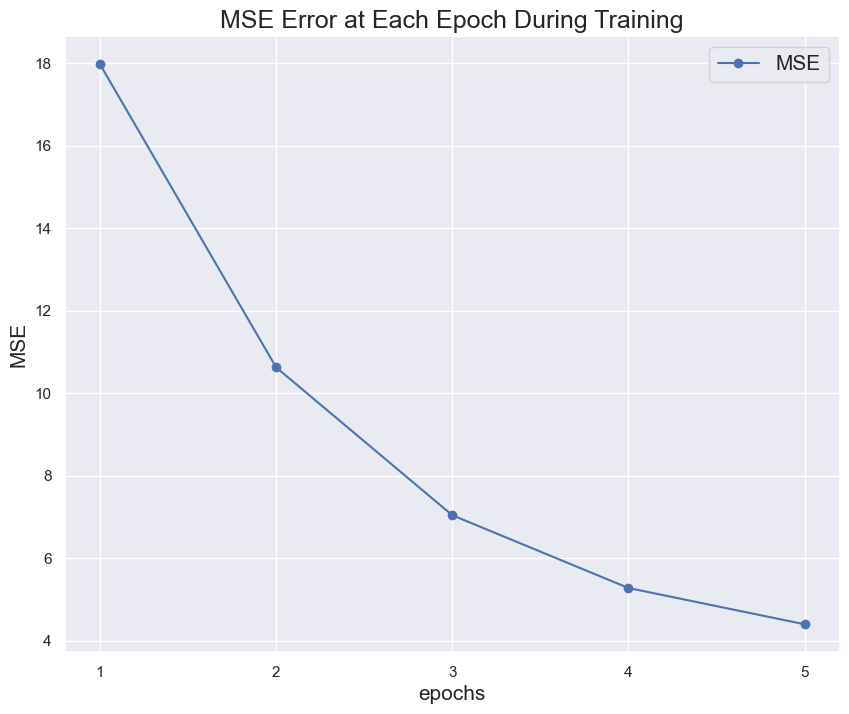

In [16]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

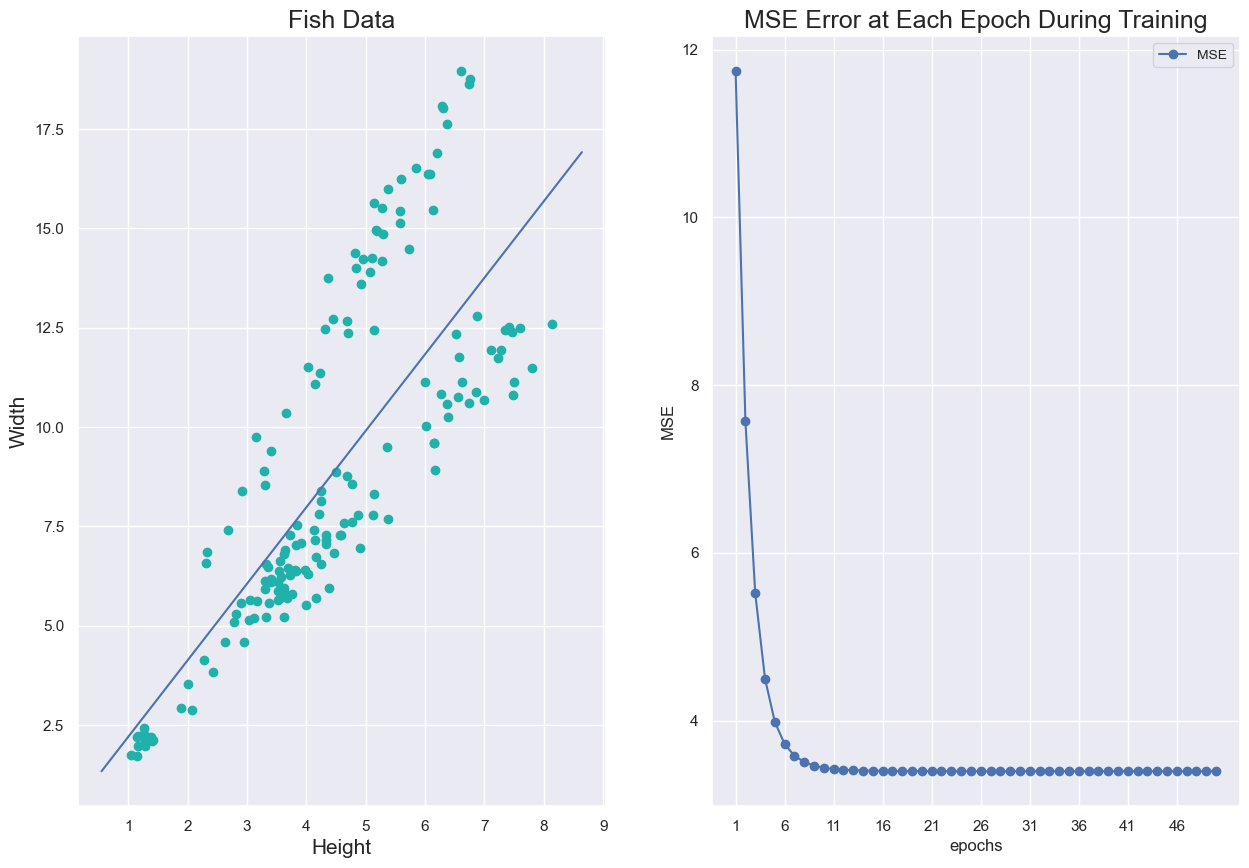

In [23]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Height", fontsize = 15)
ax1.set_ylabel("Width", fontsize = 15)
ax1.set_title("Fish Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

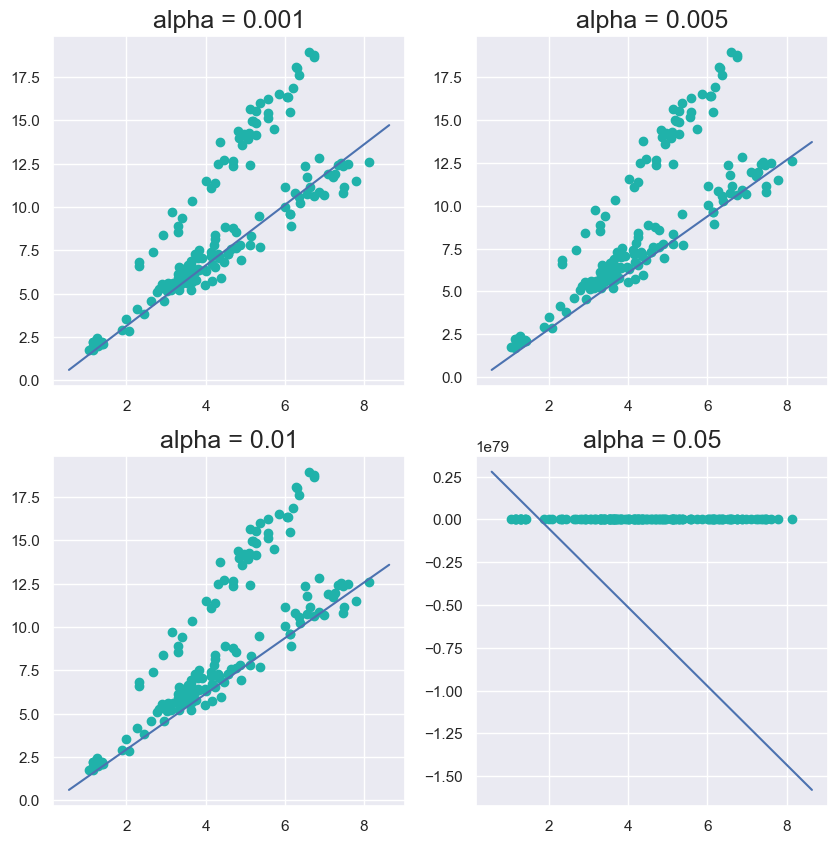

In [25]:
# Possible choices of learning rate 
alphas = [0.001, 0.005, 0.01, 0.05]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 100)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)